# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Введение

**Проект направлен** на анализ и выявление параметров объектов недвижимости, влияющих на их цену.

**Цель исследования** - ответить на 6 вопросов:

* Какие параметры влияют на ценообразование объектов недвижимости;
* Как эти параметры влияют на ценообразование объектов недвижимости;
* Как быстро продавались квартиры из текущего набора данных;
* Какие факторы больше других влияют на общую стоимость объекта;
* Какова средняя цена 1 кв.м. в 10 населённых пунктах с наибольшим числом объявлений;
* Как меняется средняя стоимость квартир в Санкт-Петурбурге при удалении от центра.

**Описание исходных данных:**

 * *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
 * *balcony* — число балконов
 * *ceiling_height* — высота потолков (м)
 * *cityCenters_nearest* — расстояние до центра города (м)
 * *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
 * *first_day_exposition* — дата публикации
 * *floor* — этаж
 * *floors_total* — всего этажей в доме
 * *is_apartment* — апартаменты (булев тип)
 * *kitchen_area* — площадь кухни в квадратных метрах (м²)
 * *last_price* — цена на момент снятия с публикации
 * *living_area* — жилая площадь в квадратных метрах (м²)
 * *locality_name* — название населённого пункта
 * *open_plan* — свободная планировка (булев тип)
 * *parks_around3000* — число парков в радиусе 3 км
 * *parks_nearest* — расстояние до ближайшего парка (м)
 * *ponds_around3000* — число водоёмов в радиусе 3 км
 * *ponds_nearest* — расстояние до ближайшего водоёма (м)
 * *rooms* — число комнат
 * *studio* — квартира-студия (булев тип)
 * *total_area* — общая площадь квартиры в квадратных метрах (м²)
 * *total_images* — число фотографий квартиры в объявлении

**Исследование пройдет в 4 этапа:**

 * Обзор исходных данных;
 * Предобработка исходных данных;
 * Добавление сопутствующих столбцов;
 * Анализ данных для ответа на поставленные в исследовании вопросы.

# Содержание <a id="Содержание"></a>

1. [Обзор исходных данных](#Обзор-исходных-данных)
2. [Предобработка исходных данных](#Предобработка-исходных-данных)
  * [Работа с пропусками](#Работа-с-пропусками)
  * [Работа с дубликатами и аномалиями](#Работа-с-дубликатами-и-аномалиями)
3. [Создание новых столбцов](#Создание-новых-столбцов)
4. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
  * [Изучение параметров датафрейма](#Изучение-параметров-датафрейма)
  * [Изучение времени на продажу объектов](#Изучение-скорости-продажи-объектов)
  * [Изучение факторов с наибольшим влиянием на общую стоимость объекта](#факторы-с-весом)
  * [Изучение стоимости квадратного метра по населенным пунктам](#стоимость-квадратного-метра)
  * [Изучение средней стоимости километра расстояния от центра среди объектов в Санкт-Петербурге](#ср-цена-за-км)
5. [Общий вывод](#Общий-вывод)

## Обзор исходных данных
<a id="Обзор-исходных-данных"></a>

Откроем файл с данными и проведем первичные операции для обозревания:

In [1]:
!pip install missingno
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
data = pd.read_csv('/datasets/real_estate_data.csv')
#выведем первые 5 строк дф для наглядности: распределение значений, заголовки и т.д.
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные представлены значениями с разделителем, исправим их представление:

In [2]:
#перезапишем переменную data с учетом разделителя
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Перед нами таблица с данными в читаемом виде, выведем общую информацию о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных присутствует большое количество пропусков относительно максимального количества строк по следующим столбцам:
* ceiling_height;
* floors_total;
* living_area;
* is_apartment;
* kitchen_area;
* balcony;
* locality_name;
* airports_nearest;
* cityCenters_nearest;
* parks_around3000;
* parks_nearest;
* ponds_around3000;
* ponds_nearest;
* days_exposition. 

Основные причины пропусков, вероятно, кроются в неуказании определенных значений параметров пользователями сервиса (человеческий фактор) и наличие проблем сопряжения с геосервисами (технический фактор). 


Также не соблюден правильный тип данных:
* first_day_exposition - object вместо datetime;
* is_apartment - object вместо bool.

И другие столбцы с плавающей запятой (floors_total, balcony, days_exposition), где значения в реальном выражении могут быть только целыми.

Для наглядного представления распределения значений каждого столбца таблицы построим гистограммы:

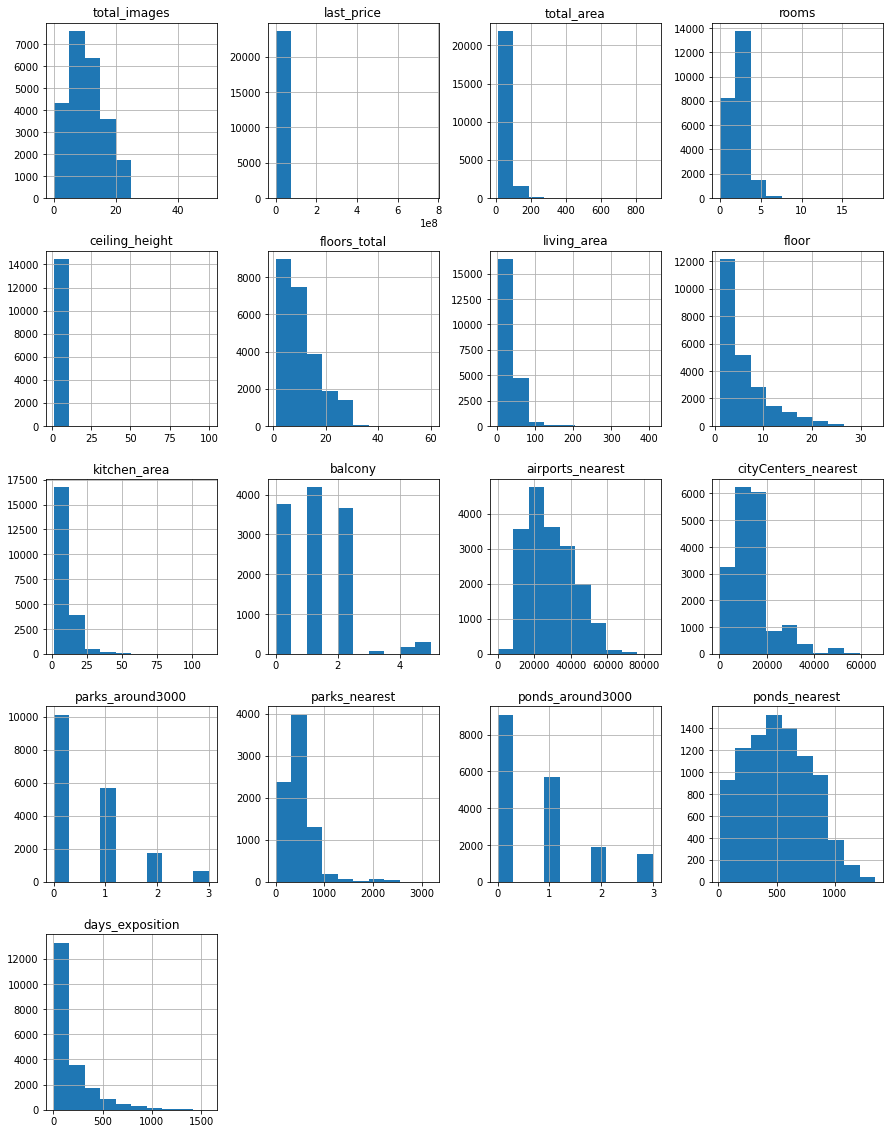

In [4]:
data.hist(figsize=(15, 20))
plt.show()

По гистограммам мы видим наличие проблем не только с пропусками, но и с самими значениями - их качеством. Например, крупная доля значений в колонке *rooms* представлена нулем, необходимо будет проверить, с чем это связано.

**Вывод:**

Мы провели первичный обзор данных и выявили необходимость масштабной предобратки, которая обязательно будет включать в себя преобразование типа данных, устранение пропусков, а также работу с аномальными значениями. 

[Вернуться к содержанию](#Содержание)

## Предобработка исходных данных
<a id="Предобработка-исходных-данных"></a>

Ранее мы выяснили, что в текущих данных большое количество пропусков - заполним их по возможности:
<a id="Работа-с-пропусками"></a>

*ceiling_height:* 

Предположим, что высота потолков зависит от количества этажей в доме или расстояния от центра города, и проверим:

In [5]:
print(f'Корреляция высоты потолков и количества этажей в доме:{data["ceiling_height"].corr(data["floors_total"])}')

Корреляция высоты потолков и количества этажей в доме:-0.028731894622727384


In [6]:
print(f'Корреляция высоты потолков и количества этажей в доме:{data["ceiling_height"].corr(data["cityCenters_nearest"])}')

Корреляция высоты потолков и количества этажей в доме:-0.09168887614722751


Предположения не подтвердились, корреляция практически нулевая, поэтому заполним пропуски медианным значением:

In [7]:
#по гистограмме при обзоре данных большого количества аномальных значений в этом столбце мы не заметили,
#поэтому негативного фактора на медиану не будет
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#проверим количество пропусков после правки
print('Количество пропусков в столбце с высотой потолков:', data["ceiling_height"].isna().sum())

Количество пропусков в столбце с высотой потолков: 0


*floors_total:*

Поскольку пропусков мало и распределение, на первый взгляд, равномерное - заполним пропуски медианой:

In [8]:
#заполним пропуски и изменим тип данных на int
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()).astype(int)
print('Количество пропусков в столбце с количеством этажей:', data["floors_total"].isna().sum())
print('Текущий тип данных в столбце:', data["floors_total"].dtype)

Количество пропусков в столбце с количеством этажей: 0
Текущий тип данных в столбце: int64


*living_area:*

Предположим, что значения данного столбца зависят от общей площади объекта недвижимости, проверим:

In [9]:
print('Корреляция жил. площади и общей площади:', data["living_area"].corr(data["total_area"]))

Корреляция жил. площади и общей площади: 0.9395373338721493


Выявлена сильная корреляция между двумя параметрами: будет правильно заменить пропуски в столбце средним значением жил. площади относительно общей площади:

In [10]:
#для замены пропусков мы вычислим среднее для дф отношение жил площади к общей площади,
#затем для каждой строки дф с пропуском в столбце будем вычислять жилплощадь на основе общей площади из этой строки
data['living_area'] = data['living_area'].fillna(
    data['living_area'].mean() / data['total_area'].mean() * data['total_area'])
print('Количество пропусков в столбце с жил. площаью:', data["living_area"].isna().sum())

Количество пропусков в столбце с жил. площаью: 0


Также необходимо учитывать, что в нашем датасете есть квартиры-студии и с открытой планировкой, однако в плане их общая площадь обычно также делится на кухню, жил. площадь и т.д.

*is_apartment:*

Данный столбец имеет подавляющее число пропусков. Считаю, что нет смысла их заполнять, так как это не принесет пользы исследованию: большинство заполненных нами данных в этом столбце могут быть искаженными. Предлагаю не использовать данный столбец в текущем исследовании. 

In [11]:
#для корректности поменяем тип данных на bool
data["is_apartment"] = data["is_apartment"].astype(bool)
print(f'Процент пропусков в столбце is_apartment: {data["is_apartment"].isna().mean()*100:.1f}')

Процент пропусков в столбце is_apartment: 0.0


*kitchen_area:*

Заполним пропуски аналогично столбцу *living_area*:

In [12]:
data['kitchen_area'] = data['kitchen_area'].fillna(
    data['kitchen_area'].mean() / data['total_area'].mean() * data['total_area'])
print('Количество пропусков в столбце с площадью кухни:', data["kitchen_area"].isna().sum())

Количество пропусков в столбце с площадью кухни: 0


*balcony:*

Заполним пропуски в этом столбце нулями, так как они могли возникнуть и из-за тех. сбоя, и из-за незаполнения значения клиентами сервиса. Доля пропусков около половины, и балкона может не быть на объекте.

In [13]:
#заполним пропуски и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype(int)
print('Количество пропусков в столбце с количеством балконов:', data["balcony"].isna().sum())
print('Текущий тип данных в столбце:', data["balcony"].dtype)

Количество пропусков в столбце с количеством балконов: 0
Текущий тип данных в столбце: int64


*locality_name:*

Столбец представляет собой названия населенных пунктов, в которых располагается объект недвижимости, часть пропусков мы можем заполнить с помощью значений из столбца *cityCenters_nearest*, который показывает удаленность объекта от центра города, но сначала нужно понять: показывают ли значения этого столбца удаленность от центра Санкт-Петербурга или от центра городов из, например, агломерации: 

In [14]:
#посмотрим на минимальные и максимальные значения столбца, чтобы определить, с какими городами мы имеем дело
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Максимальное значение удаленности от центра равно 66 км, в связи с чем мы понимаем, что в столбце имеется в виду именно центр Санкт-Петербурга.

Теперь перезапишем значения столбца *locality_name:*, где пропущено название населенного пункта и удаленность от центра составляет менее 16 км (абстрактно берем диаметр города за 32 км) - такие объекты находятся непосредственно в Санкт_петербурге:

In [15]:
#Выясним количество пропусков до правки
print(f'Количество пропусков до правки: {data["locality_name"].isna().sum()}')
#Приведем название столбца cityCenters_nearest к нижнему регистру/переименуем
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
#с помощью логических операций находим нужные строки и меняем пропуск на "Санкт-Петербург"
data['locality_name'] = data['locality_name'].where(
    ~(data['locality_name'].isna() & (data['city_centers_nearest'] < 16000)), 'Санкт-Петербург')
#Выясним количество пропусков после правки
print('Количество пропусков после правки:', data["locality_name"].isna().sum())

Количество пропусков до правки: 49
Количество пропусков после правки: 21


Было заполнено 28 значений, остальные строки датафрейма с пропущенными значениями в столбце *locality_name* мы вынуждены удалить по следующим причинам:
* Нет другого очевидного способа заполнить пропуски; 
* Значения столбца важны в текущем исследовании;
* Оставшиеся строки с пропусками в столбце составляют крайне малую долю от всех данных.

In [16]:
data = data.dropna(subset=['locality_name'])
print('Количество пропусков после правки:', data["locality_name"].isna().sum())

Количество пропусков после правки: 0


 *airports_nearest*, *city_centers_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*:
 
 Все эти столбцы относятся к данным, подгруженным из геосервисов. Не считаю возможным полное логичное замещение пропусков в этих столбцах, которое не пойдет в разрез с логикой других данных датасета, поэтому оставим пропуски.

*days_exposition:*

Пропуски из этого столбца мы аналогично не можем восполнить: средние значения исказят исследование, нулевые значения выглядят еще менее логичными - оставляем все как есть.

Ранее мы попутно исправляли типы данных в столбцах на корректные, без внимания остался столбец *first_day_exposition*, изменим тип object на datetime:

In [17]:
#оставим только год, месяц и день, т.к. время в таблице указано нулями и не понадобится в исследовании 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Проверим проведенную работу по заполнению пропусков и преобразованию типа данных в столбцах:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23678 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23678 non-null  int64         
 1   last_price            23678 non-null  float64       
 2   total_area            23678 non-null  float64       
 3   first_day_exposition  23678 non-null  datetime64[ns]
 4   rooms                 23678 non-null  int64         
 5   ceiling_height        23678 non-null  float64       
 6   floors_total          23678 non-null  int64         
 7   living_area           23678 non-null  float64       
 8   floor                 23678 non-null  int64         
 9   is_apartment          23678 non-null  bool          
 10  studio                23678 non-null  bool          
 11  open_plan             23678 non-null  bool          
 12  kitchen_area          23678 non-null  float64       
 13  balcony         

Большое количество столбцов, где нам пришлось оставить пропуски, также бросается во внимание тип данных в столбце *days_exposition*, который мы не можем перевести в целочисленный из-за тех же пропусков.

Визуализируем полноту данных после исправлений для наглядности:

<AxesSubplot:>

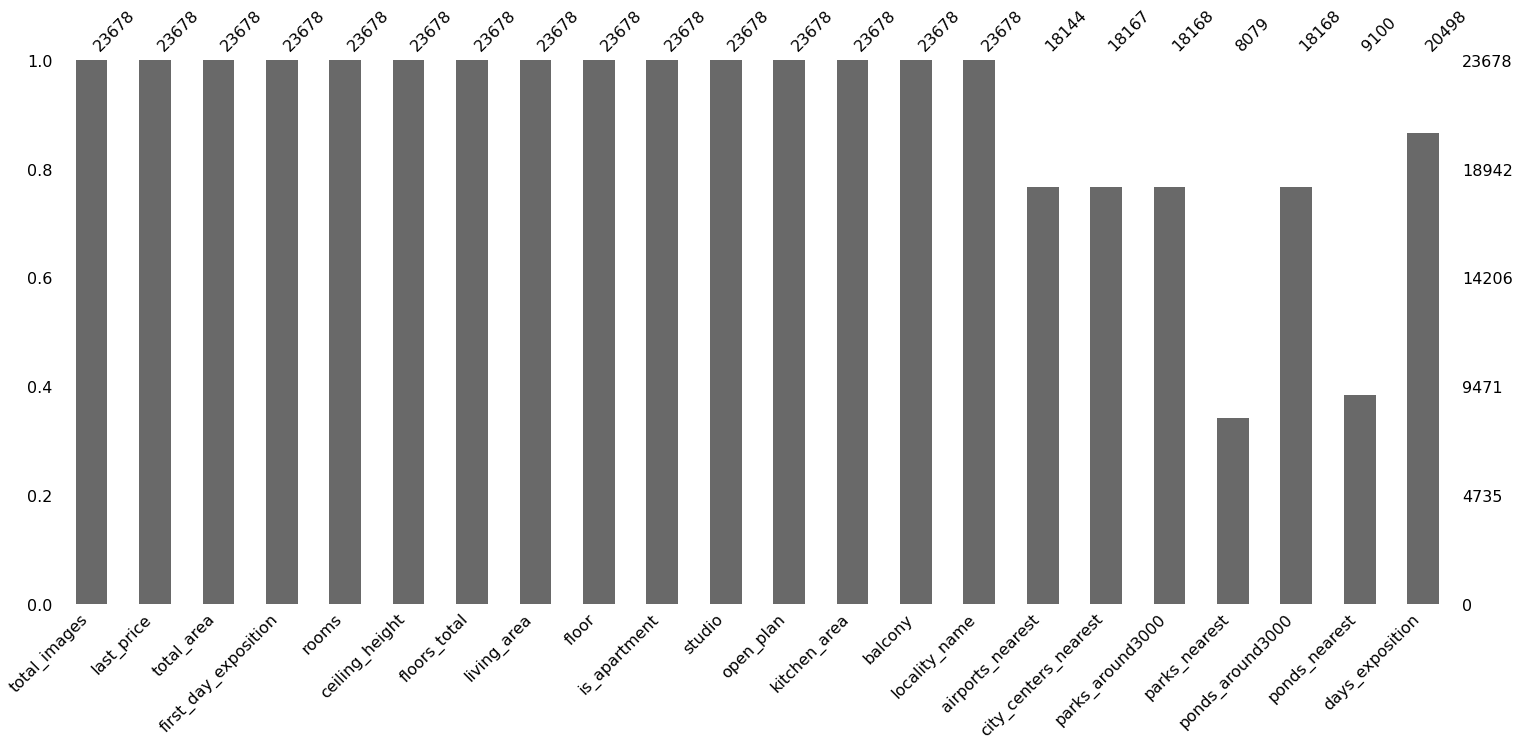

In [19]:
msno.bar(data) 

Видим, что самые важные данные присутствуют, за исключением *days_exposition* и *city_centers_nearest*, полнота которых, впрочем, превышает 75%.

Приступим к устранению дубликатов: <a id="Работа-с-дубликатами-и-аномалиями"></a>

Исходя из природы данных, в датафрейме могут быть неявные дубликаты по столбцу *locality_name*.

In [20]:
#выведем все уникальные значения столбца с названиями населенных пунктов для оценки
#и их количество для дальнейшего сравнения после исправлений
print('Количество уникальных названий:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных названий: 364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Найдено множество дубликатов из-за разного написания в названиях "е", "ё" и типа поселения, исправляем:

In [21]:
#уберем ё из названий
data['locality_name'] = data['locality_name'].str.replace('ё','е')
#заменим городской поселок и поселок городского типа на обычное название
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
print('Количество уникальных названий:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных названий: 322


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Убрали 42 дубликата. Остаются значения со схожими названиями, например, "коттеджный поселок Лесное" и "поселок Лесное", но они не являются одним и тем же населенным пунктом.

Обратим внимание на аномальные значения в датасете, например, в столбце *rooms*, которые мы заметили, строя гистограммы при первичном обзоре.

Для выявления "выбросов" воспользуемся box-plot для каждого столбца с числовыми количественными значениями:

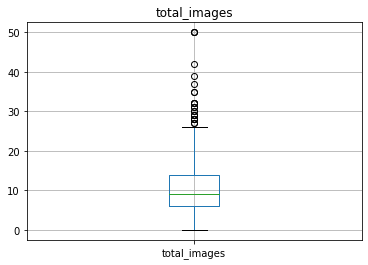

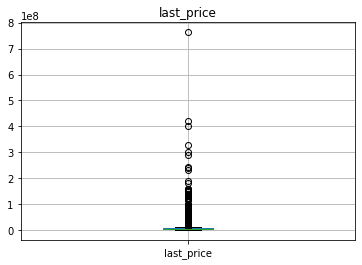

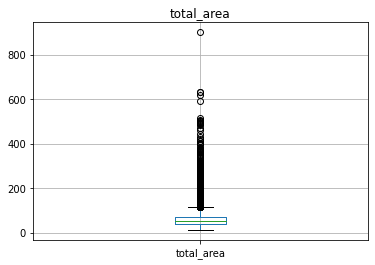

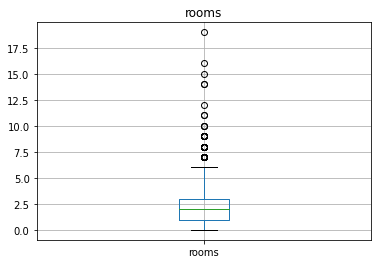

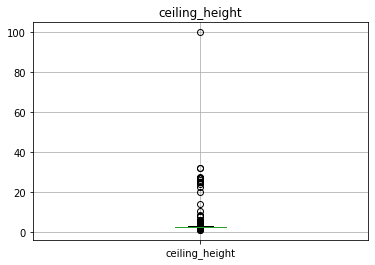

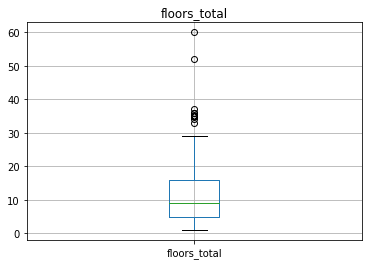

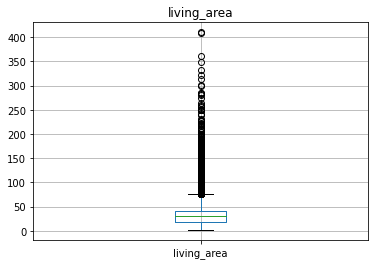

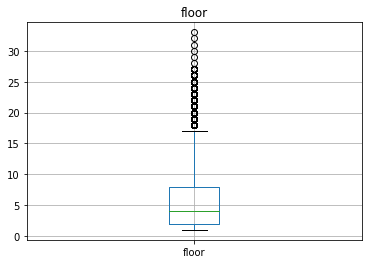

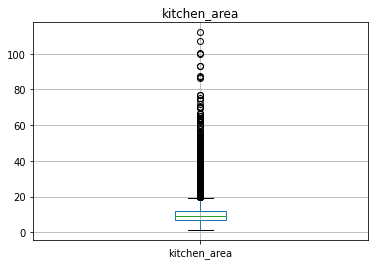

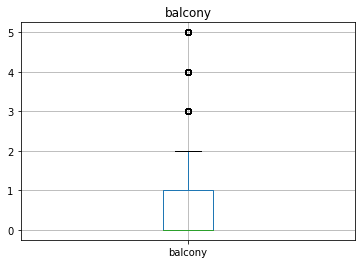

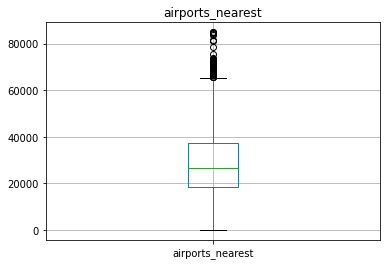

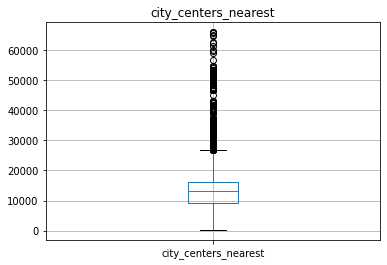

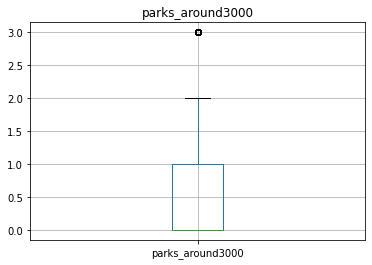

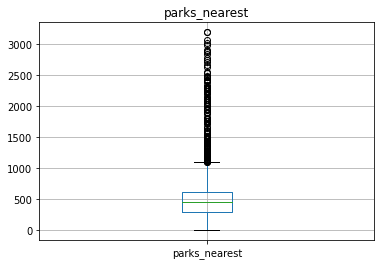

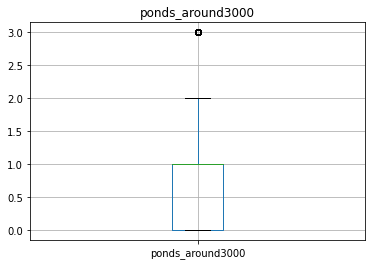

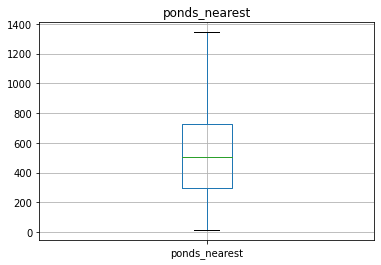

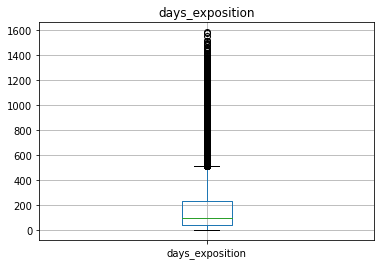

In [22]:
#сохраним соответствующие столбцы в список
columns_list_for_boxplot = ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',\
'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'city_centers_nearest',\
'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
#создадим боксплот по каждому столбцу из списка
for col in columns_list_for_boxplot:
    data.boxplot(col)
    plt.title(col)
    plt.show()

В основном вопросы вызывают выбивающиеся значения по столбцам *last_price*, *total_area*, *rooms*, *ceiling_height*, *living_area*, *kitchen_area*.

Составим по ним таблицу с диапазоном значений, отрывающихся от общего пула выше 3го квартиля +1.5Q, и в случае с *rooms* - менее 1 комнаты:

Сначала подробнее рассмотрим ситуацию с *rooms*:

In [23]:
#найдем количество объектов с 0 комнатами по показателям, из-за которых клиенты сервиса
#могли указать 0 комнат
print('Количество объектов с 0 комнатами по критериям:', 
      data[((data['open_plan']==True) | 
     (data['studio']==True)) &
     (data['rooms']<1)]['rooms'].count())

Количество объектов с 0 комнатами по критериям: 197


In [24]:
#посчитаем, сколько всего квартир в датасете с 0 комнатами
print('Всего объектов с 0 комнатами:', data[data['rooms']<1]['rooms'].count())

Всего объектов с 0 комнатами: 197


Видим, что общее количество объектов с нулем комнат и количество студий и объектов с открытой планировкой, по которым клиенты указали 0 комнат, совпадает. Ошибки в данных нет.

Рассмотрим другие столбцы с аномальными значениями:

In [25]:
#найдем количество выбивающихся значений по каждой категории
print('Количество аномалий по последней стоимости:', data[data['last_price']>20000000]['last_price'].count())
print('Количество аномалий по общей площади:', data[data['total_area']>520]['last_price'].count())
print('Количество аномалий по высоте потолка:', data[data['ceiling_height']>10]['last_price'].count())
print('Количество аномалий по жилой площади:', data[data['living_area']>350]['last_price'].count())
print('Количество аномалий по площади кухни:', data[data['kitchen_area']>80]['last_price'].count())

Количество аномалий по последней стоимости: 707
Количество аномалий по общей площади: 5
Количество аномалий по высоте потолка: 25
Количество аномалий по жилой площади: 3
Количество аномалий по площади кухни: 9


In [26]:
print('Всего строк в датасете с аномальными значениями:', data[(data['last_price']>20000000) |
     (data['total_area']>520) |
     (data['ceiling_height']>10) |
     (data['living_area']>350) |
     (data['kitchen_area']>80)]['last_price'].count())

Всего строк в датасете с аномальными значениями: 733


Если с аномальными значениями по стоимости и различным площадям еще можно мириться, то строки с аномальным высоким значением потолков непонятны.

Рассмотрим их детально вместе с другими показателями:

In [27]:
data[data['ceiling_height']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,9.668043,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,8.000000,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,True,...,7.000000,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,True,...,4.378643,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.500000,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,9.000000,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,7.000000,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,...,12.000000,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,True,...,5.700000,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,True,...,5.200000,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Видим, что ни один объект не выделяется по другим параметрам (например, общей площадью).

Так как мы не можем выявить правдоподобность этих данных или исправить их, также учитывая небольшое количество этих строк, будем удалять их из датасета для повышения его качества:

In [28]:
#удаляем строки посредством логической индексации
data = data[~(data['ceiling_height']>10)]
#ресетаем индексы после удаления
data.reset_index(drop=True, inplace=True)

Посмотрим, что представляют собой данные после предобработки:

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23653 entries, 0 to 23652
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23653 non-null  int64         
 1   last_price            23653 non-null  float64       
 2   total_area            23653 non-null  float64       
 3   first_day_exposition  23653 non-null  datetime64[ns]
 4   rooms                 23653 non-null  int64         
 5   ceiling_height        23653 non-null  float64       
 6   floors_total          23653 non-null  int64         
 7   living_area           23653 non-null  float64       
 8   floor                 23653 non-null  int64         
 9   is_apartment          23653 non-null  bool          
 10  studio                23653 non-null  bool          
 11  open_plan             23653 non-null  bool          
 12  kitchen_area          23653 non-null  float64       
 13  balcony         

**Вывод:**

Мы провели предобработку данных:

* Устранены пропуски во всех столбцах кроме тех, которые напрямую зависят от геосервисов и *days_exposition* - пропуски в этих столбцах не могут быть заполнены вероятной информацией без ущерба качеству данных, по поводу пропусков необходимо написать сотрудникам, ответственным за выгрузку для дальнейшего устранения подобных ошибок;
* Тип данных приведен к корректному во всех столбцах, кроме *days_exposition* - пропуски в столбце противоречат целочисленному типу;
* Проведена работа с аномальными значениями, удалены артефакты по высоте потолков, проверены объекты с нулевым количеством комнат, остальные данные с аномальными значениями решено оставить как есть, так как их существование в реальном выражении возможно, в связи с чем они могут быть показательными для нашего исследования.

[Вернуться к содержанию](#Содержание)

## Создание новых столбцов
<a id="Создание-новых-столбцов"></a>

Добавим в датафрейм новые столбцы для упрощения индексации и описания строк:

*square_meter_price* - цена одного квадратного метра 

In [30]:
#добавляем столбец с ценой за кв м для каждой строки и округляем результат до 2 знаков после запятой
data['square_meter_price'] = (data['last_price']/data['total_area']).round(2)
#проверим корректность
print('Тип столбца:', data['square_meter_price'].dtype)
data[['last_price', 'total_area', 'square_meter_price']].sample(3)

Тип столбца: float64


,last_price,total_area,square_meter_price
12288,5300000.0,78.0,67948.72
16656,3499000.0,43.0,81372.09
14327,6790000.0,71.7,94700.14


*publication_day* - день недели публикации объявления

In [31]:
data['publication_day'] = data['first_day_exposition'].dt.weekday
#проверим корректность
print('Тип столбца:', data['publication_day'].dtype)
data[['first_day_exposition', 'publication_day']].sample()

Тип столбца: int64


,first_day_exposition,publication_day
13882,2019-02-09,5


*publication_month* - месяц публикации объявления

In [32]:
data['publication_month'] = data['first_day_exposition'].dt.month
#проверим корректность
print('Тип столбца:', data['publication_month'].dtype)
data[['first_day_exposition', 'publication_month']].sample(3)

Тип столбца: int64


,first_day_exposition,publication_month
11211,2018-02-22,2
7161,2018-11-19,11
2202,2015-12-01,12


*publication_year* - год публикации объявления

In [33]:
data['publication_year'] = data['first_day_exposition'].dt.year
#проверим корректность
print('Тип столбца:', data['publication_year'].dtype)
data[['first_day_exposition', 'publication_year']].sample(3)

Тип столбца: int64


,first_day_exposition,publication_year
2241,2015-07-24,2015
14571,2018-06-20,2018
16183,2018-02-01,2018


*floor_category* - тип этажа квартиры

In [34]:
#создадим функцию для категоризации этажей
def floor_level(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#применим фунцию к дф построчно
data['floor_category'] = data.apply(floor_level, axis=1)
#проверим выполнение
print('Тип столбца:', data['floor_category'].dtype)
data[['floor', 'floors_total', 'floor_category']].sample(3)

Тип столбца: object


,floor,floors_total,floor_category
3146,4,11,другой
10497,18,18,последний
19533,2,5,другой


*city_centers_nearest_km* - расстояние до центра города в километрах

In [35]:
#создаем столбец со значениями расстояния от центра, переведенными в км и округленными до целого числа
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
#проверяем корректность
print('Тип столбца:', data['city_centers_nearest_km'].dtype)
data[['city_centers_nearest', 'city_centers_nearest_km']].sample(3)

Тип столбца: float64


,city_centers_nearest,city_centers_nearest_km
23196,25263.0,25.0
16067,2357.0,2.0
10476,NaN,NaN


In [36]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'square_meter_price',
       'publication_day', 'publication_month', 'publication_year',
       'floor_category', 'city_centers_nearest_km'],
      dtype='object')

**Вывод:**

Добавлено 6 новых столбцов в датафрейм:

 * *square_meter_price* - цена одного квадратного метра 
 * *publication_day* - день недели публикации объявления
 * *publication_month* - месяц публикации объявления
 * *publication_year* - год публикации объявления
 * *floor_category* - тип этажа квартиры
 * *city_centers_nearest_km* - расстояние до центра города в километрах
 
[Вернуться к содержанию](#Содержание)

## Исследовательский анализ данных
<a id="Исследовательский-анализ-данных"></a>

Приступим к исследованию обработанных данных.

Изучим параметры датафрейма: <a id="Изучение-параметров-датафрейма"></a>

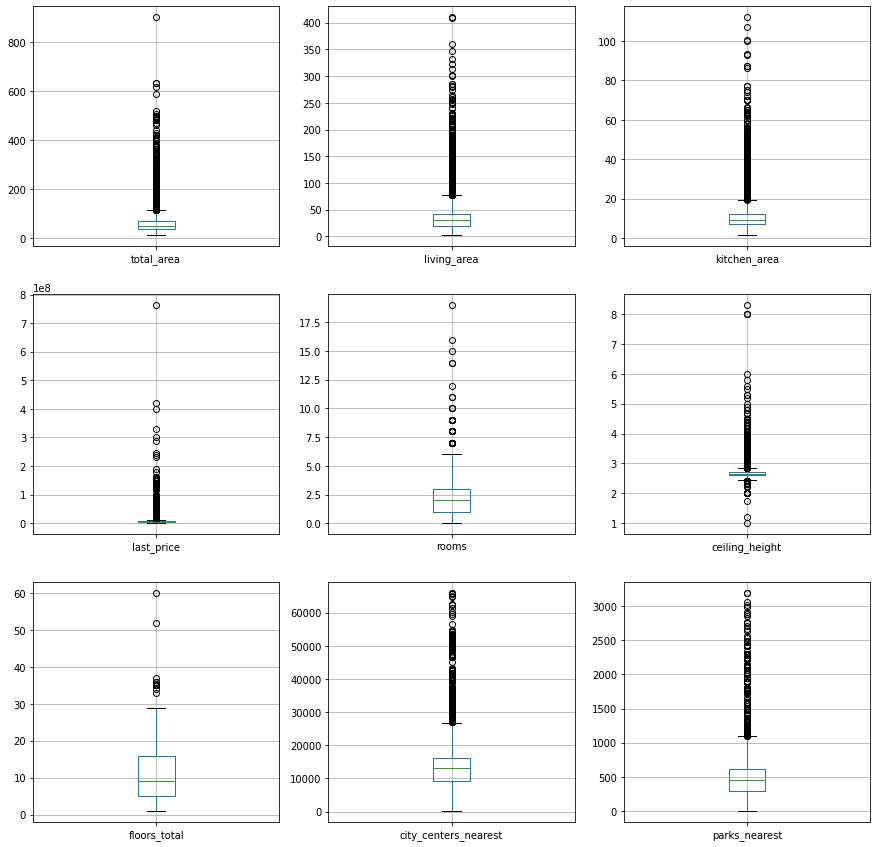

In [37]:
#вновь построим боксплот для каждого необходимого параметра(кроме категории этажей)
boxplot_col_list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
                    'ceiling_height', 'floors_total', 'city_centers_nearest', 'parks_nearest']
data[boxplot_col_list].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 15), grid=True)
plt.show()

Теперь мы видим диапазоны для выявления распределения, однако боксплот по последним ценам в нечитаемом для нас виде, исправим:

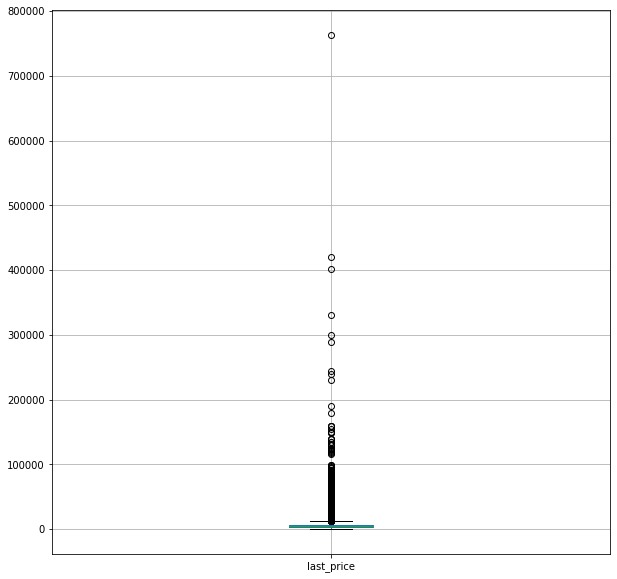

In [38]:
#создадим значения цен в тысячах, для избежания формата le8
(data['last_price']/1000).plot(kind='box', figsize=(10, 10), grid=True)
plt.show()

In [39]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
                    'ceiling_height', 'floors_total', 'city_centers_nearest', 'parks_nearest']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,city_centers_nearest,parks_nearest
count,23653.000000,23653.000000,23653.000000,2.365300e+04,23653.000000,23653.000000,23653.000000,18151.000000,8071.000000
mean,60.351654,34.595594,10.505223,6.544803e+06,2.070985,2.697722,10.665962,14186.227646,490.802007
std,35.669335,22.364266,6.038419,1.089659e+07,1.078827,0.232536,6.580647,8604.742889,342.418839
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,181.000000,1.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,5.000000,9234.000000,288.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.650000,9.000000,13094.000000,455.000000
75%,69.800000,42.100000,12.000000,6.800000e+06,3.000000,2.700000,16.000000,16293.000000,612.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,8.300000,60.000000,65968.000000,3190.000000


Предварительно мы видим, что:

* Цены разнятся от 12190р (вероятно, цена аренды) до 763000000р;
* Есть объекты как с 0 комнат (ранее мы выявили, что это не ошибка, а квартиры-студии или с открытой планировкой), так и с 19 комнатами, что вполне нормально, учитывая разброс цен;
* Общая площадь объектов разнится с 12 кв.м. (возможно, комната в аренду или на продажу, которых много в Санкт-Петербурге, как и мини-квартиры из бывших комнат в общежитиях) до 900 кв.м. - помним про разброс цен;
* Площадь кухни начинается с 1.3 кв.м., что возможно из-за мини типа квартир в аренду(например, которые сдаются только посуточно);
* Есть объекты с высотой потолков до 8.3м, что нормально при учете квартир и помещений в Санкт-Петербурге с высотой потолков 5-10м.
* Количество этажей: есть как одноэтажные здания, так и объекты из 60 этажных небоскребов (возможно сдача офиса в Лахта-Центре).

Зафиксируем диапазоны:
* *total_area*: 20-120 кв.м.
* *living_area*: 7-80 кв.м.
* *kitchen_area*: 5-20 кв.м.
* *last_price*: 0-15000000 р.
* *rooms*: 0-6 комнат
* *ceiling_height*: 2,5-2,9 м.
* *floors_total*: 1-29 этажей
* *city_centers_nearest*: 0-26000 м.
* *parks_nearest*: 0-1100 м.

Теперь, опираясь на границы boxplot, построим гистограмы для каждого параметра, чтобы оценить распределение значений:

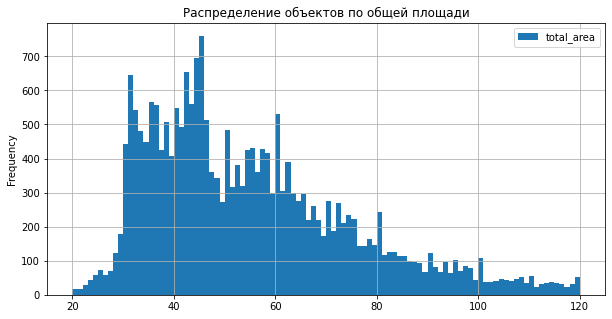

In [40]:
#строим гистограмму по общей площади
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(10,5), range=(20,120))
plt.title('Распределение объектов по общей площади')
plt.show()

На гистограмме есть 2 пика: объекты с 30 кв.м. и объекты с 45 кв.м.

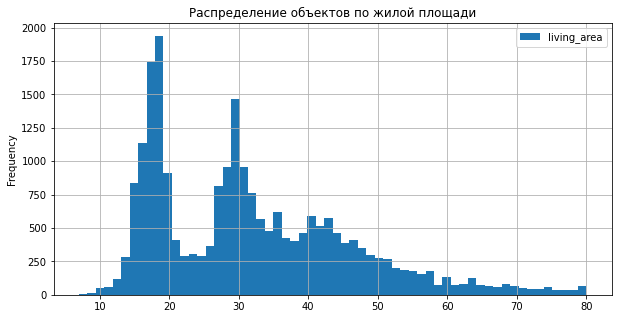

In [41]:
#строим гистограмму по жил площади
data.plot(y='living_area', kind='hist', bins=60, grid=True, figsize=(10,5), range=(7,80))
plt.title('Распределение объектов по жилой площади')
plt.show()

Снова 2 пика: объекты с жилой площадью в 19 кв.м. и 30 кв.м.

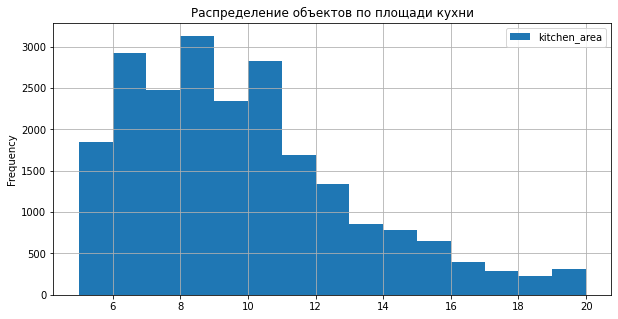

In [42]:
#строим гистограмму по площади кухни
data.plot(y='kitchen_area', kind='hist', bins=15, grid=True, figsize=(10,5), range=(5,20))
plt.title('Распределение объектов по площади кухни')
plt.show()

Большинство объектов имеют площадь кухни от 6 до 10 кв.м., с пиком на 8,5 кв.м.

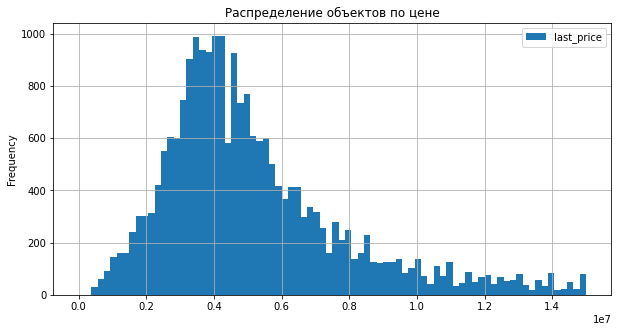

In [43]:
#строим гистограмму по последней цене
data.plot(y='last_price', kind='hist', bins=80, grid=True, figsize=(10,5), range=(0,15000000))
plt.title('Распределение объектов по цене')
plt.show()

Самая популярная цена на объекты из датасета составляет 4 млн.р. 

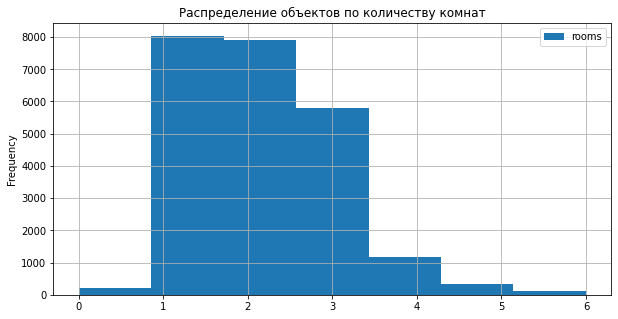

In [44]:
#строим гистограмму по комнатам
data.plot(y='rooms', kind='hist', bins=7, grid=True, figsize=(10,5), range=(0,6))
plt.title('Распределение объектов по количеству комнат')
plt.show()

Наиболее популярными предложениями в сервисе являются 1-2 комнатные объекты 

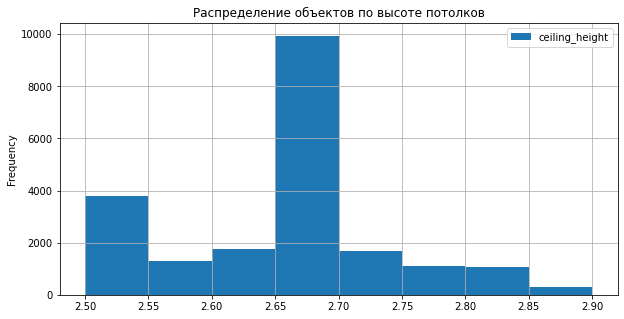

In [45]:
#строим гистограмму по высоте потолков
data.plot(y='ceiling_height', kind='hist', bins=8, grid=True, figsize=(10,5), range=(2.5,2.9))
plt.title('Распределение объектов по высоте потолков')
plt.show()

Чаще всего в датасете встречаются объекты с высотой потолков 2.7, это стандартное значение в стране

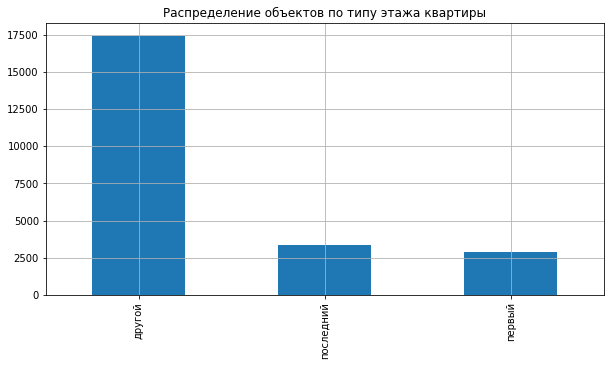

In [46]:
#строим гистограмму по типу этажа квартиры
data['floor_category'].value_counts().plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение объектов по типу этажа квартиры')
plt.show()

Количество квартир на первом или на последнем этаже практически равно, но большую часть всех квартир составляют объекты на других этажах. Выглядит логично. 

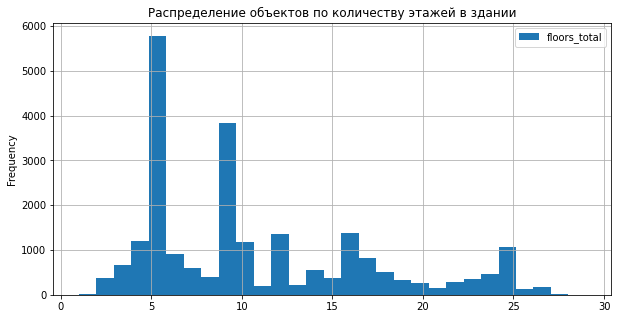

In [47]:
#строим гистограмму по количеству этажей в здании
data.plot(y='floors_total', kind='hist', bins=29, grid=True, figsize=(10,5), range=(1,29))
plt.title('Распределение объектов по количеству этажей в здании')
plt.show()

Больше всего зданий в наших данных имеют 5 или 9 этажей с преимуществом у 5 этажных объектов

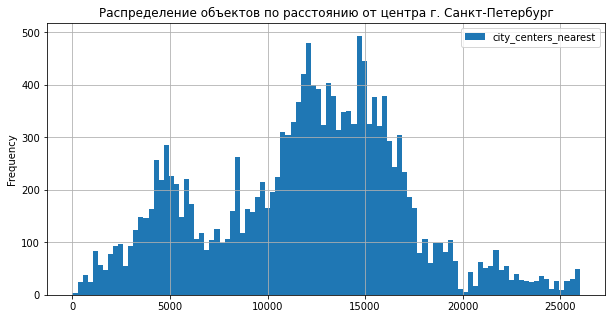

In [48]:
#строим гистограмму по удаленности от центра Санкт-Петербурга
data.plot(y='city_centers_nearest', kind='hist', bins=100, grid=True, figsize=(10,5), range=(0,26000))
plt.title('Распределение объектов по расстоянию от центра г. Санкт-Петербург')
plt.show()

В основном объекты из нашего датасета удалены от центра Санкт-Петербурга на 10-15 км., с пиками в 12 и 14 км., однако не стоит забывать, что столбец с этими данными имеет пропуски, в связи с чем нельзя полагаться на выводы по текущей гистограмме

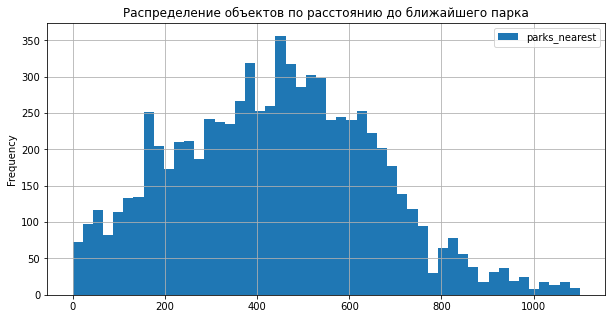

In [49]:
#строим гистограмму по расстоянию до ближайшего парка
data.plot(y='parks_nearest', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,1100))
plt.title('Распределение объектов по расстоянию до ближайшего парка')
plt.show()

В основном объекты из нашего датасета находятся в 450 м. от ближайшего к ним парка, крупная часть объектов имеет расстояние в 180 м., но данные по столбцу вновь с пропусками

Изучим, как быстро продавались объекты из наших архивных данных: <a id="Изучение-скорости-продажи-объектов"></a>

In [50]:
#для анализа будем использовать столбец days_exposition
data['days_exposition'].describe()

count    20479.000000
mean       180.939401
std        219.835645
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что в среднем объекты продают за полгода, медиана составляет 95 дней, что является очень хорошим показателем, однако если брать во внимание другие данные (например, по цене), то результатом может быть не только продажа объекта, но и сдача в аренду, которая обычно проходит быстрее.

Посмотрим на распределение данных:

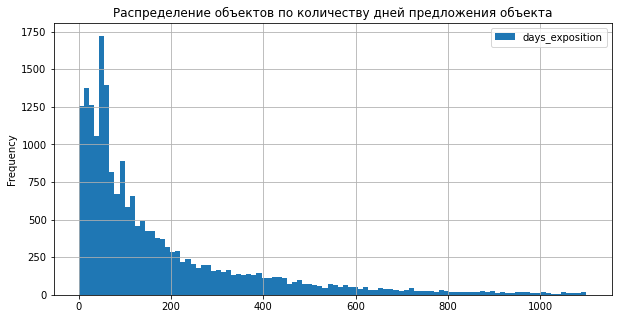

In [51]:
#строим гистограмму по дням нахождения объекта в выдаче сервиса
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(10,5), range=(0,1100))
plt.title('Распределение объектов по количеству дней предложения объекта')
plt.show()

Мы видим высокую концентрацию значений в левой части гистограммы с длинным хвостом направо.
Согласно такому распределению объекты продаются/сдаются в относительно короткие сроки с 2мя пиками около 30 и 70 дней экспозиции, исходя из колебаний и удлинения хвоста на графике делаем вывод, что продажи в 100 дней и менее - короткие продажи для сервиса, 400 и более - долгие. Также необходимо понимать, что есть пропуски в столбце и само название столбца говорит о том, что не все значения - это продажа/сдача в аренду, объявление по объекту могли просто снять. 

Рассмотрим пиковые значения более детально, чтобы установить их природу:

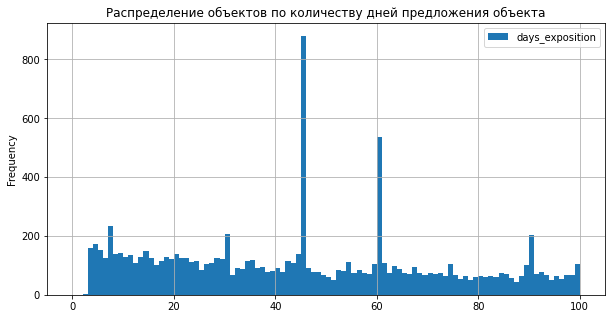

In [67]:
#строим аналогичную гистограмму, но установим лимит до 100 по x, который соответствует диапазону пиковых значений:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(10,5), range=(0,100))
plt.title('Распределение объектов по количеству дней предложения объекта')
plt.show()

Видим, что пиковыми значениями, которые выбиваются из распределения, являются 45 и 60 дней публикации предложений клиентами. 

Согласно документации сервиса Яндекс.Недвижимость (https://yandex.ru/support/realty/realtor/home/add-ads-housing.html) размещение предложений объектов определенного типа ограничено соответствующим количеством дней.

Рассмотрим совпадения с нашими пиковыми значениями: 

* 45 дней - продажа комнаты или квартиры до 4,5 млн.р.;
* 60 дней - продажа квартиры от 4,5 млн.р до 10 млн.р., посуточная аренда, коммерческая недвижимость.

Вероятно, такие "выбросы" связаны с прекращением бесплатного размещения объявления и последующим его снятием, однако информация по документации сервиса действует для всех городов, кроме столиц и соответствующих областей, то есть Санкт-Петербург и Ленинградская область попадают под другие требования.

Возможно, ранее (на момент добавления данных в архив) требования были одинаковыми и для Санкт-Петербурга/ЛО в частности, поэтому оставим версию, что пиковые значения связаны со снятием объявлений по их бесплатной экспозии в сервисе. 

Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта: <a id='факторы-с-весом'></a>

Для наглядности построим сводную таблицу рассматриваемых параметров по последней цене объекта

In [52]:
data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms',
                                                                'publication_day', 'publication_month', 'publication_year'])

,kitchen_area,living_area,publication_day,publication_month,publication_year,rooms,total_area
last_price,,,,,,,
12190.0,40.500000,32.000000,2.00,3.000000,2019.00,2.000000,109.000000
430000.0,7.728934,23.416451,0.50,5.000000,2018.50,1.500000,42.200000
440000.0,7.005828,22.839187,1.00,7.000000,2018.00,1.000000,40.000000
450000.0,6.635777,23.145679,2.25,6.000000,2017.75,1.750000,40.100000
470000.0,7.660130,27.042083,4.00,3.666667,2018.00,1.333333,40.833333
...,...,...,...,...,...,...,...
300000000.0,70.000000,258.000000,0.00,12.000000,2017.00,7.000000,618.000000
330000000.0,40.000000,95.000000,2.00,4.000000,2018.00,3.000000,190.000000
401300000.0,24.000000,204.000000,5.00,2.000000,2016.00,5.000000,401.000000


Особых закономерностей, кроме "больше цена - больше площадь", не видно (и даже это применимо не ко всем объектам в датафрейме).

Разберем связь цены с параметрами по отдельности:

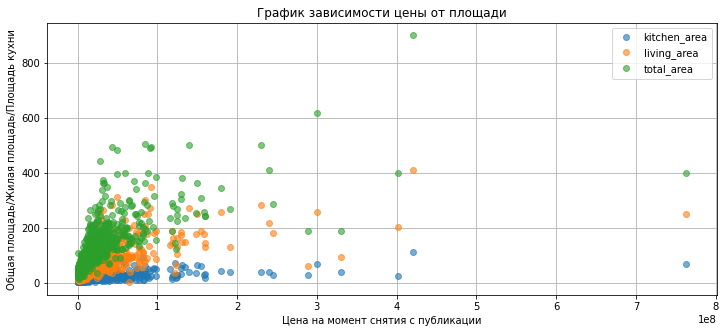

In [53]:
data_pivot_price = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area'])
data_pivot_price.plot(style='o',grid=True, alpha=0.6, figsize=(12, 5), title='График зависимости цены от площади')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Общая площадь/Жилая площадь/Площадь кухни')
plt.show()

На графике плохо видно значения площадии кухни объектов, выведем отдельную диаграмму:

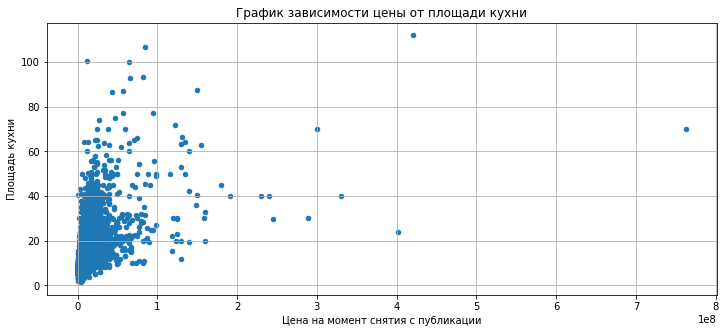

In [54]:
data.plot.scatter(x='last_price', y='kitchen_area', figsize=(12, 5), grid=True, title='График зависимости цены от площади кухни')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь кухни')
plt.show()

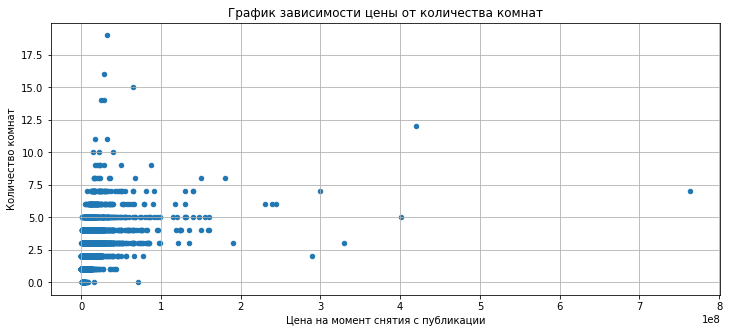

In [55]:
data.plot.scatter(x='last_price', y='rooms', figsize=(12, 5), grid=True, title='График зависимости цены от количества комнат')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество комнат')
plt.show()

По диаграммам рассеяния видно, что общая и жилая площадь имеют прямую положительную связь с ценой, присутствует положительная связь цены с количеством комнат и площадью кухни, но слабая:

In [56]:
print('Корреляция цены и количества комнат:', data['last_price'].corr(data['rooms']))
print('Корреляция цены и площади кухни:', data['last_price'].corr(data['kitchen_area']))

Корреляция цены и количества комнат: 0.36358158711974403
Корреляция цены и площади кухни: 0.5144931966959637


Вычислим связь между этажом и стоимостью:

In [57]:
data.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
floor_category,,,
другой,17402,6.680984e+06,4850000.0
первый,2914,4.800107e+06,3900000.0
последний,3337,7.358179e+06,4300000.0


Без визуализации видим, что, судя по среднему значению, с повышением этажа объекта повышается и цена - прямая положительная зависимость, но если судить по медиане, то прямой связи нет, так как объекты из категории "другой" будут дороже объектов из остальных категорий. Одно можно сказать точно: квартиры на первом этаже дешевле остальных, а объекты на последнем этаже - дороже, чем на первом, но так же дешевле, чем на последующих, даже учитывая количество значений в этих категориях. 

Для подтверждения рассмотрим ту же таблицу, но в пределах наших значений из boxplot по цене, чтобы исключить выбросы и проверить среднее значение:

In [58]:
data[(data['floor_category'].notna()) & (data['last_price']<15000000)]\
.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
floor_category,,,
другой,16454,5.362899e+06,4690000.0
первый,2846,4.256055e+06,3850000.0
последний,3110,4.806448e+06,4150000.0


Среднее соответствует медиане - оставляем сделанный вывод. 

Рассмотрим изменение цены в зависимости от времени выставления на продажу:

,count,mean,median
publication_day,,,
6,1694,6.252637e+06,4550000.0
5,1934,6.980374e+06,4555000.0
4,3991,6.373141e+06,4590000.0
0,3604,6.515746e+06,4650000.0
3,4288,6.713359e+06,4650000.0
2,3967,6.629697e+06,4700000.0
1,4175,6.396977e+06,4720000.0


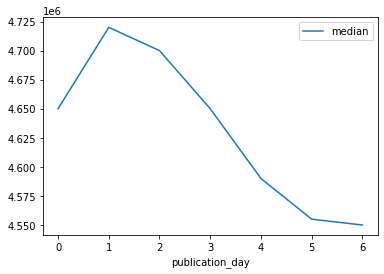

In [59]:
data_pivot_day = data.pivot_table(index = 'publication_day', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_pivot_day.columns = ['count', 'mean', 'median']
data_pivot_day.plot(y = 'median')
data_pivot_day.sort_values('median')

Чем ближе к выходным - тем ниже цены, логичная закономерность, связанная с активностью покупателей.

,count,mean,median
publication_day,,,
6,1694,6.252637e+06,4550000.0
5,1934,6.980374e+06,4555000.0
4,3991,6.373141e+06,4590000.0
0,3604,6.515746e+06,4650000.0
3,4288,6.713359e+06,4650000.0
2,3967,6.629697e+06,4700000.0
1,4175,6.396977e+06,4720000.0


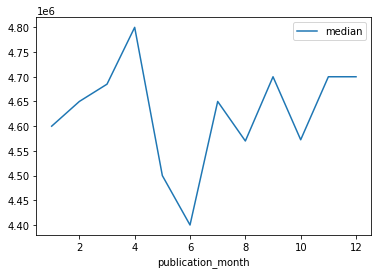

In [60]:
data_pivot_month = data.pivot_table(index = 'publication_month', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_pivot_month.columns = ['count', 'mean', 'median']
data_pivot_month.plot(y = 'median')
data_pivot_day.sort_values('median')

Цена предложений понижается в середине года. Ситуация такая же, как и со днем недели: ниже активность покупателей (отпуска) - меньше цена.

,count,mean,median
publication_year,,,
2017,8177,6.587729e+06,4500000.0
2016,2779,6.831760e+06,4550000.0
2018,8504,5.952500e+06,4550000.0
2019,2872,6.786280e+06,5050000.0
2015,1184,8.601950e+06,5350000.0
2014,137,1.208714e+07,7700000.0


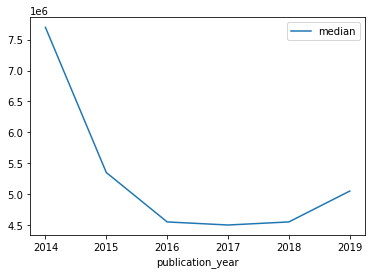

In [61]:
data_pivot_year = data.pivot_table(index = 'publication_year', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_pivot_year.columns = ['count', 'mean', 'median']
data_pivot_year.plot(y = 'median')
data_pivot_year.sort_values('median')

В первый год мы видим резкое снижение цены, что может быть связано с кризисом и последующим падением спроса, минимальная точка: 2017 год, затем идет повышение цены - корректировка рынка (может быть связана с повышением доходов населения, снижением ипотечных ставок и дальнейшим повышением спроса). 

Таким образом, мы рассмотрели, как различные факторы влияют на общую стоимость объекта:
* Общая площадь, жилая площадь - имеют прямую положительную связь с ценой;
* Площадь кухни, количество комнат - имеют положительную, но не ярко выраженную связь с ценой, уступают во влиянии общей площади;
* Этаж объекта - нет прямой связи, однако первый этаж - самый дешевый, последний дороже, остальные - самые дорогие;
* День, месяц и год публикации - имеют сильное влияние на ценообразование, не сами числа непосредстовенно, а конъюнктура, которую они представляют.

Сильнейшее влияние на общую стоимость в нашем исследовании имеет общая площадь и дата публикации (год).

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра: <a id='стоимость-квадратного-метра'></a>

In [62]:
#используем медианные значения в качестве средних, чтобы обойти выбросы
top_cities_pivot = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'median'])
top_cities_pivot.columns = ['Число предложений', 'Средняя цена за кв.м. в рублях']
top_cities_pivot = top_cities_pivot.sort_values(by='Число предложений', ascending=False).round()[:10]
top_cities_pivot.sort_values(by='Средняя цена за кв.м. в рублях', ascending=False)

,Число предложений,Средняя цена за кв.м. в рублях
locality_name,,
Санкт-Петербург,15734,104762.0
Пушкин,369,100000.0
деревня Кудрово,299,91860.0
поселок Парголово,327,91643.0
поселок Мурино,554,85878.0
поселок Шушары,440,76876.0
Колпино,338,74724.0
Гатчина,306,67861.0
Всеволожск,398,65789.0


Логично, что самая высокая цена за 1 кв.м. в Санкт-Петербурге, самая низкая - в Выборге (самый удаленный населенный пункт от Питера из выборки).

Найдем среднюю цену километра расстояния от центра среди объектов в Санкт-Петербурге: <a id='ср-цена-за-км'></a>

In [63]:
#выделим объекты в спб
data_spb = data[data['locality_name']=='Санкт-Петербург']
#найдем цену каждого километра от центра, будем использовать медиану
spb_avg_km_price = data_spb.groupby('city_centers_nearest_km')['last_price'].median()
spb_avg_km_price

city_centers_nearest_km
0.0     17900000.0
1.0     11490000.0
2.0     10000000.0
3.0      8418000.0
4.0      9200000.0
5.0      9490000.0
6.0      8900000.0
7.0      7800000.0
8.0      7445000.0
9.0      5300000.0
10.0     5025000.0
11.0     5096500.0
12.0     4950000.0
13.0     5200000.0
14.0     4870000.0
15.0     4900000.0
16.0     4770000.0
17.0     4580000.0
18.0     4300000.0
19.0     4500000.0
20.0     5525000.0
21.0     5289476.0
22.0     4925000.0
23.0     4500000.0
24.0     3480000.0
25.0     3794881.0
26.0     3320000.0
27.0     8300000.0
28.0     4990000.0
29.0     4535000.0
Name: last_price, dtype: float64

Мы получили список медианной цены объектов на каждый километр от центра Санкт-Петербурга из нашего датасета.

Построим график ее изменения для большей наглядности:

Text(0, 0.5, 'Средняя цена, р')

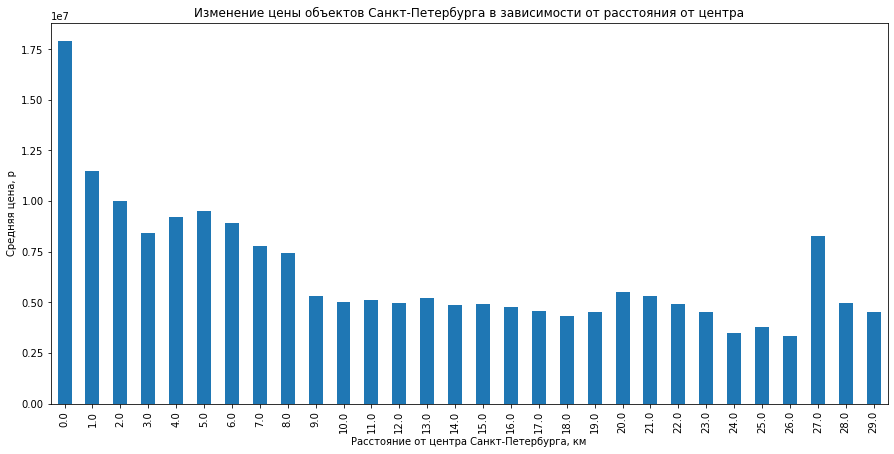

In [64]:
spb_avg_km_price.plot(kind='bar', figsize=(15,7))

plt.title('Изменение цены объектов Санкт-Петербурга в зависимости от расстояния от центра')
plt.xlabel('Расстояние от центра Санкт-Петербурга, км')
plt.ylabel('Средняя цена, р')

Общая тенденция ожидаемая: снижение цены при удаленности от центра.

Обратим внимание на отдельные значения:

* Пик цены в самом центре (0 км) понятен, присутствует относительный пик на окраине (27 км), сопоставимый с ценами объектов на удалении в 3 км - это может быть связано с характером района, его обустройством и назначением;
* Объекты на расстоянии от 9 до 19 км от центра имеют сравнительно одинаковую стоимость - спальные районы и окраина города;
* Самые низкие цены: с 24 по 26 км., что больше похоже на агломерацию.

Также нужно учитывать, что мы вели анализ по данным с большим количеством пропусков.

**Вывод:**

* Изучили параметры нашего датафрейма и проверили распределение значений;
* Изучили время, затраченное на продажу объектов: чаще всего 30 или 70 дней, определили, что менее 100 дней - это быстрая продажа для сервиса, свыше 400 - долгая;
* Изучили факторы с наибольшим влиянием на общую стоимость объектов: общая площадь и дата размещения;
* Выделили населенные пункты с самой высокой и самой низкой стоимостью 1 кв.м.: Санкт-Петербург и Выборг соответственно;
* Изучили распределение цен объектов Санкт-Петербурга в зависимости от удаления от центра: снижение цены при удаленности от центра с необычным значением на 27 км.

[Вернуться к содержанию](#Содержание)

## Общий вывод
<a id="Общий-вывод"></a>

На основе предоставленных данных было исследовано:

* Какие параметры влияют на ценообразование объектов недвижимости и как: основное влияние оказывают такие параметры, как общая площадь, жилая площадь, площадь кухни - цена увеличивается с увеличением площади, количество комнат - имеет слабое положительное влияние, удаленность от регионального центра - чем дальше, тем дешевле, этаж - объекты на первом этаже дешевле, дата публикации предложения - влияние состояния рынка на момент публикации, например, количества спроса;
* Как быстро продавались квартиры из текущего набора данных: по исходным данным самое популярное время, за которое реализуются объекты - это 45 и 60 дней, что может быть связано с прекращением бесплатного размещения объектов на сервисе, исходя из полной картины данных мы видим значительное снижение количества предложений с отметками в 100 и 400, из чего делаем вывод, что чаще всего объекты реализуются до 100 дней;
* Какие факторы больше других влияют на общую стоимость объекта: общая и жилая площадь имеют сильную корреляцию с ценой объекта, что логично, ведь в грубом выражении это основной фактор ценообразования, также дата размещения, а, конкретно, конъюнктура рынка в момент публикации предложения, например, было выделено, что с 2014 года цена ощутима снизилась и начала набирать в 2018;
* Какова средняя цена 1 кв.м. в 10 населённых пунктах с наибольшим числом объявлений: согласно этому срезу, самая высокая цена за 1 кв.м. в Санкт-Петербурге: 104762р, самая низкая - в Выборге: 58158р (остальные в порядке убывания: Пушкин 100000р, деревня Кудрово 91860р, поселок Парголово 91643р, поселок Мурино 85878р, поселок Шушары	76876р, Колпино	74724р, Гатчина	67861р, Всеволожск 65789р), цены соответствуют удалению от регионального центра;
* Как меняется средняя стоимость квартир в Санкт-Петурбурге при удалении от центра: уменьшается: 2 резких снижения на 1 и 9 км, стагнация цен при удалении с 9 до 19 км от центра, есть резкое повышение на 27 км, что, вероятно, связано со спецификой района. 

[Вернуться к содержанию](#Содержание)